<a href="https://colab.research.google.com/github/HongJeongHwan/MachineLearning/blob/main/%EC%8B%A4%EC%8A%B502_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89%EC%83%9D%EC%A1%B4%EC%97%AC%EB%B6%80%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##■ 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [ ]:
# file_path = '/content/drive/MyDrive/KDT/03. 정형데이터분석시각화/02. Data파일/titanic_preprocessed.csv'
file_path = '/content/drive/MyDrive/KDT/04. 머신러닝/02. Data파일/titanic_preprocessed1.csv'
df_titanic = pd.read_csv(file_path)

# df_titanic.drop(columns=['PassengerId','Name','Ticket'], inplace=True)
print(df_titanic)
# df_titanic.info()

      Survived  Pclass  Gender  SibSp  Parch      Fare  Embarked  Age2  title  \
0            0       3       1      1      0    7.2500         2     2      2   
1            1       1       0      1      0   71.2833         0     3      3   
2            1       3       0      0      0    7.9250         2     2      1   
3            1       1       0      1      0   53.1000         2     3      3   
4            0       3       1      0      0    8.0500         2     3      2   
...        ...     ...     ...    ...    ...       ...       ...   ...    ...   
1304         0       3       1      0      0    8.0500         2     2      2   
1305         1       1       0      0      0  108.9000         0     3      4   
1306         0       3       1      0      0    7.2500         2     3      2   
1307         0       3       1      0      0    8.0500         2     2      2   
1308         0       3       1      1      1   22.3583         0     2      0   

      num_family  alone  
0

##■ 학습용 데이터와 평가용 데이터 생성

In [ ]:
# 1. 전체 컬럼에 대해서 모델링
#


In [ ]:
# X_data = df_titanic.drop(columns=['Survived','alone','Age'])
X_data = df_titanic.drop(columns=['Survived','alone'])
y_data = df_titanic.loc[:,'Survived']
# print(X_data)
# print(y_data)

# 정답 분포 확인 --> y_data의 항목별 비율
'''
# 치우친 데이터셋은 편향이 일어나는 문제가 있다.
# 1. Under Sampling / Over Sampling을 하는 방법이 있다.
# 2. 위의 것이 안된다면, train/test 데이터에서도 비율을 62.3 / 37.7%로 동일하게 맞춰주어야 한다.
'''
y_data.value_counts(normalize=True)

# train_test_split() 사용
'''
최초 평가데이터가 약 32%이었으므로, train/test 비율을 7:3으로 맞춘다.
'''
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=0,stratify=y_data)

In [ ]:
# 학습용 데이터  확인
print(f'X_train 모양 확인 : {X_train.shape}\n')
print(f'y_train 모양 확인 : {y_train.shape}\n')
# X_train.info()
print(f'X_train 인덱스 확인 : {X_train.index}\n')
print(f'y_train 인덱스 확인 : {y_train.index}\n')

print(f'y_train 정답의 분포 확인 :\n{y_train.value_counts(normalize=True)}\n')
# stratify를 사용하기 전
# 결과 : 원본데이터비율(62.3:37.7) --> 분리후 데이터 비율(64.7:35.3)로 약간의 차이가 발생
# stratify를 사용하기 후
# 결과 : 원본데이터비율(62.3:37.7) --> 분리후 데이터 비율(62.2:37.7)로 원본의 비율 그대로...

X_train 모양 확인 : (916, 9)

y_train 모양 확인 : (916,)

X_train 인덱스 확인 : Int64Index([ 867, 1230,  238,   12,  521,  931,  717, 1030,  481, 1282,
            ...
             122,  767,  634,  547,  683, 1256, 1232,  906, 1239,  403],
           dtype='int64', length=916)

y_train 인덱스 확인 : Int64Index([ 867, 1230,  238,   12,  521,  931,  717, 1030,  481, 1282,
            ...
             122,  767,  634,  547,  683, 1256, 1232,  906, 1239,  403],
           dtype='int64', length=916)

y_train 정답의 분포 확인 :
0    0.622271
1    0.377729
Name: Survived, dtype: float64



In [ ]:
# 평가용 데이터  확인
print(f'X_test 모양 확인 : {X_test.shape}\n')
print(f'y_test 모양 확인 : {y_test.shape}\n')
# X_train.info()
print(f'X_test 인덱스 확인 : {X_test.index}\n')
print(f'y_test 인덱스 확인 : {y_test.index}\n')

print(f'y_test 정답의 분포 확인 :\n{y_test.value_counts(normalize=True)}\n')
# stratify를 사용하기 후
# 결과 : 원본데이터비율(62.3:37.7) --> 분리후 데이터 비율(62.3:37.6)로 원본의 비율 그대로...

X_test 모양 확인 : (393, 9)

y_test 모양 확인 : (393,)

X_test 인덱스 확인 : Int64Index([1270,  135,  132, 1213,  379,  792,  551, 1302,  441,  701,
            ...
            1041,  336,   42,  230, 1126, 1056, 1100,  384,  471,  932],
           dtype='int64', length=393)

y_test 인덱스 확인 : Int64Index([1270,  135,  132, 1213,  379,  792,  551, 1302,  441,  701,
            ...
            1041,  336,   42,  230, 1126, 1056, 1100,  384,  471,  932],
           dtype='int64', length=393)

y_test 정답의 분포 확인 :
0    0.62341
1    0.37659
Name: Survived, dtype: float64



##■ DecisionTree 모델을 이용한 분류

###→ 모델 생성

In [ ]:
# 모델 생성 함수 임포트
# 모델 생성함수 호출 --> 모델 생성
dt = DecisionTreeClassifier(random_state=0)

###→ 모델 학습

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

###→ 학습결과 시각화

In [ ]:
# 모델 학습시 생성된 의사결정 트리의 깊이 확인
depth = dt.get_depth()
print(f'생성된 의사결정 트리의 최대 깊이 : {depth}\n')

생성된 의사결정 트리의 최대 깊이 : 20



[Text(0.5, 0.9, 'Gender <= 0.5\ngini = 0.47\nsamples = 916\nvalue = [570, 346]'),
 Text(0.2708333333333333, 0.7, 'num_family <= 3.5\ngini = 0.287\nsamples = 323\nvalue = [56, 267]'),
 Text(0.16666666666666666, 0.5, 'Pclass <= 2.5\ngini = 0.227\nsamples = 298\nvalue = [39, 259]'),
 Text(0.08333333333333333, 0.3, 'Fare <= 28.856\ngini = 0.079\nsamples = 169\nvalue = [7, 162]'),
 Text(0.041666666666666664, 0.1, '\n  (...)  \n'),
 Text(0.125, 0.1, '\n  (...)  \n'),
 Text(0.25, 0.3, 'Embarked <= 1.5\ngini = 0.373\nsamples = 129\nvalue = [32, 97]'),
 Text(0.20833333333333334, 0.1, '\n  (...)  \n'),
 Text(0.2916666666666667, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'Pclass <= 2.5\ngini = 0.435\nsamples = 25\nvalue = [17, 8]'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.4166666666666667, 0.3, 'Fare <= 58.225\ngini = 0.351\nsamples = 22\nvalue = [17, 5]'),
 Text(0.375, 0.1, '\n  (...)  \n'),
 Text(0.4583333333333333, 0.1, '\n  (...)  \n'),
 Text(0.7291666

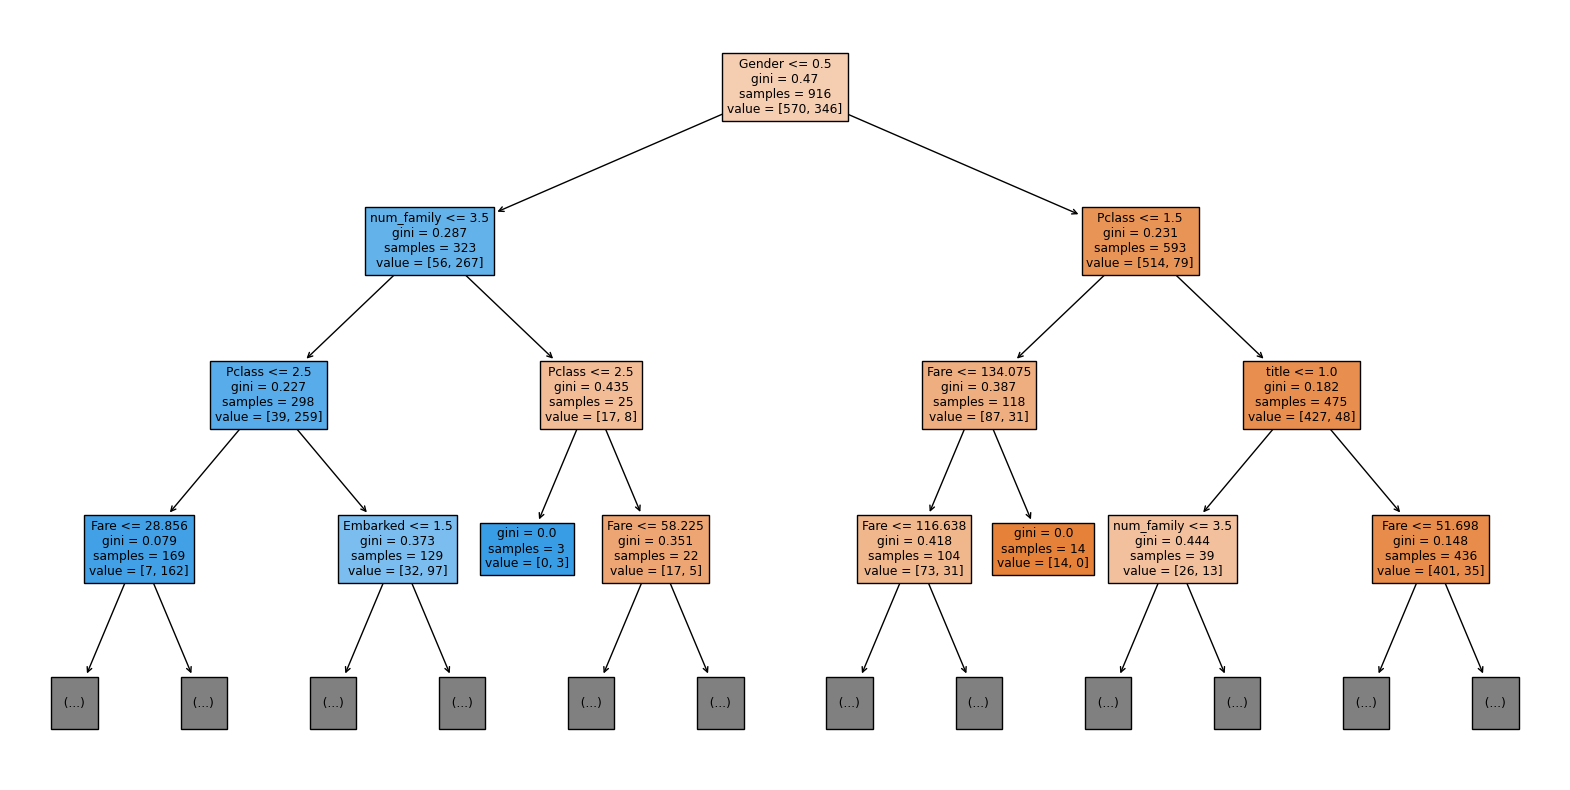

In [ ]:
# 의사결정트리 구조 시각화
# 이미지 크기 설정
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))

# 트리구조 시각화
plot_tree(dt, max_depth=3, filled=True, feature_names=X_train.columns)

###→ 학습용/평가용 데이터를 이용한 예측

In [ ]:
# 학습용 데이터를 이용한 예측
pred_train = dt.predict(X_train)
print(f'학습용 데이터에 대한 예측의 결과값 :\n{pred_train}')

학습용 데이터에 대한 예측의 결과값 :
[0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1
 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 1
 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0
 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1
 0 1 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0
 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0
 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1
 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0
 0 

In [ ]:
# 평가용 데이터를 이용한 예측
pred_test = dt.predict(X_test)
print(f'평가용 데이터에 대한 예측의 결과값 :\n{pred_test}')

평가용 데이터에 대한 예측의 결과값 :
[1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0
 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0
 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0
 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1
 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0
 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0]


###→ 모델 평가

In [ ]:
# 학습용 데이터에 대한 정확도 평가
accuracy_train = accuracy_score(y_train, pred_train)

# 평가용 데이터에 대한 정확도 평가
accuracy_test = accuracy_score(y_test, pred_test)

# 결과 확인
print(f'학습용 데이터에 대한 정확도 : {accuracy_train}\n')
print(f'평가용 데이터에 대한 정확도 : {accuracy_test}\n')

학습용 데이터에 대한 정확도 : 0.9552401746724891

평가용 데이터에 대한 정확도 : 0.8091603053435115



###→ GridSearchCV를 이용한 모델 *최적화*

####: 모델 생성

In [ ]:
# 최적화할 모델 생성
base_dt = DecisionTreeClassifier(random_state=0)

# 튜닝할 매개변수 설정
params = {'max_depth':[3,4,5,6,7,8,9]}

# GridSearchCV 함수 호출, 모델 생성
grid_dt = GridSearchCV(estimator=base_dt,param_grid=params,cv=10,scoring='accuracy')

# GridSearchCV 학습 및 평가
grid_dt.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

In [ ]:
# 최적의 성능을 나타내는 하이퍼파라미터 확인
grid_dt.best_params_

{'max_depth': 3}

In [ ]:
# best 모델 생성
best_dt = DecisionTreeClassifier(max_depth=3,random_state=0)

####: 모델학습

In [ ]:
# 모델 학습
best_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

####: 학습용/평가용 데이터에 대한 예측

In [ ]:
# 학습용 데이터에 대한 예측
pred_train = best_dt.predict(X_train)
# 평가용 데이터에 대한 예측
pred_test = best_dt.predict(X_test)

####: 모델 평가

In [ ]:
# 학습용 데이터에 대한 정확도 평가
accuracy_train = accuracy_score(y_train,pred_train)
# 평가용 데이터에 대한 정확도 평가
accuracy_test = accuracy_score(y_test,pred_test)

# 결과 확인
print(f'학습용 데이터에 대한 정확도 : {accuracy_train}\n')
print(f'평가용 데이터에 대한 정확도 : {accuracy_test}\n')

학습용 데이터에 대한 정확도 : 0.8657205240174672

평가용 데이터에 대한 정확도 : 0.8702290076335878



###→ 결과 시각화

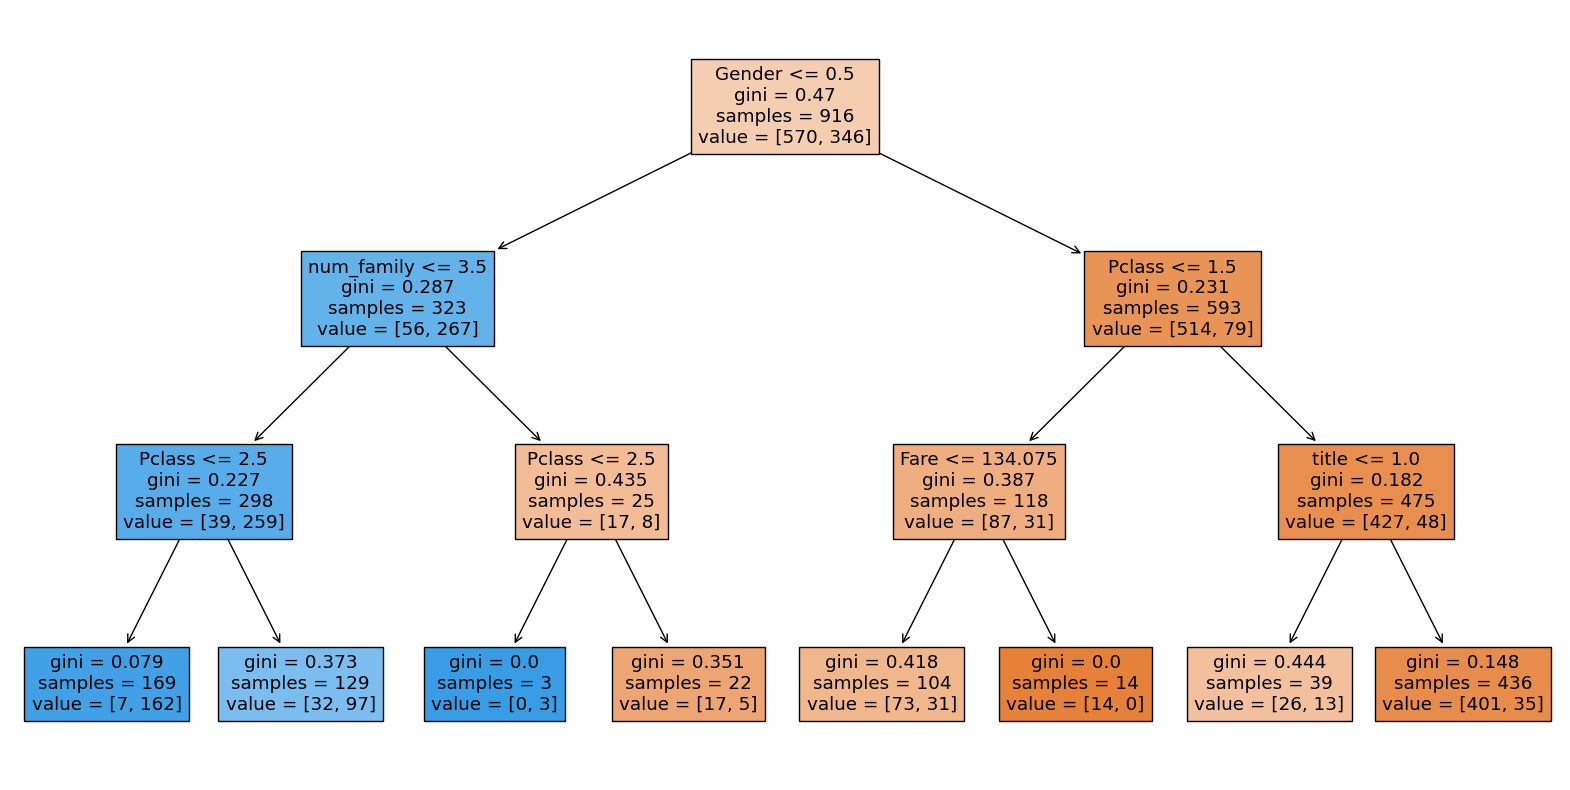

In [ ]:
# 필요한 함수 임포트
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 이미지 크기 재설정
plt.figure(figsize=(20,10))

# plot_tree() 사용
plot_tree(best_dt, feature_names=X_train.columns, filled=True)
plt.show()

###→ feature_importance_ 추출 및 시각화

[0.06073869 0.85164153 0.         0.         0.00928662 0.
 0.         0.01941868 0.05891447]
Pclass        0.060739
Gender        0.851642
SibSp         0.000000
Parch         0.000000
Fare          0.009287
Embarked      0.000000
Age2          0.000000
title         0.019419
num_family    0.058914
dtype: float64
Gender        0.851642
Pclass        0.060739
num_family    0.058914
title         0.019419
Fare          0.009287
SibSp         0.000000
Parch         0.000000
Embarked      0.000000
Age2          0.000000
dtype: float64


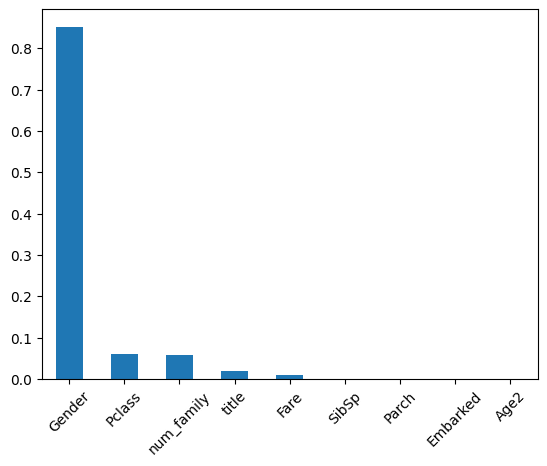

In [ ]:
# 학습된 모델의 feature_importances_ 확인
importances = best_dt.feature_importances_
print(importances)
'''
전체를 100으로 봤을때 각 컬럼의 기여도를 표시해준다.
[0.06073869, 0.85164153, 0.        , 0.        , 0.00928662,       0.        , 0.        , 0.01941868, 0.05891447]
'''

# Series 자료형 생성
s_importances = pd.Series(data=importances, index=X_train.columns)
print(s_importances)

# Series 자료형 --> 내림차순 정렬 + 시각화
print(s_importances.sort_values(ascending=False))
s_importances.sort_values(ascending=False).plot(kind='bar',rot=45)
plt.show()

In [ ]:
X_train

,Pclass,Gender,SibSp,Parch,Fare,Embarked,Age2,title,num_family
867,1,1,0,0,50.4958,2,3,2,0
1230,3,1,0,0,7.2292,0,2,0,0
238,2,1,0,0,10.5000,2,1,2,0
12,3,1,0,0,8.0500,2,1,2,0
521,3,1,0,0,7.8958,2,2,2,0
...,...,...,...,...,...,...,...,...,...
1256,3,0,1,9,69.5500,2,2,3,10
1232,3,1,0,0,7.5792,2,3,2,0
906,2,0,1,0,27.7208,0,2,3,1
1239,2,1,0,0,13.5000,2,2,2,0


##■ RandomForest 모델을 이용한 분류

###→ 모델생성

In [ ]:
# 모델 생성함수 임포트
# 모델 생성함수 호출, 모델 생성
rf = RandomForestClassifier(random_state=0)

###→ 모델학습

In [ ]:
# fit() 함수 --> 모델 학습
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# 모델 학습시 사용된 하이퍼파라미터 확인
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

###→ 학습용/평가용 데이터를 이용한 예측

In [ ]:
# 학습용 데이터를 이용한 예측
pred_train = rf.predict(X_train)
# 평가용 데이터를 이용한 예측
pred_test = rf.predict(X_test)

###→ 모델평가

In [ ]:
# 필요한 함수 임포트
# 학습용 데이터에 대한 정확도 평가
accuracy_train = accuracy_score(y_train,pred_train)
# 평가용 데이터에 대한 정확도 평가
accuracy_test = accuracy_score(y_test,pred_test)

# 결과 확인
print(f'학습용 데이터에 대한 정확도 = {accuracy_train}\n')
print(f'평가용 데이터에 대한 정확도 = {accuracy_test}\n')

학습용 데이터에 대한 정확도 = 0.9552401746724891

평가용 데이터에 대한 정확도 = 0.8447837150127226



###→ GridSearchCV를 이용한 모델 최적화

####: 모델 생성

In [ ]:
# GridSearchCV 함수 실행
# 필요한 함수 임포트
# 최적화할 기본모델 생성
base_rf = RandomForestClassifier(random_state=0)

# 튜닝할 매개변수 설정
params = {'n_estimators':[100,200,300,400],'max_depth':[3,4,5,6,7,8,9]}

# GridSearchCV 함수 호출, 모델 생성
grid_rf = GridSearchCV(estimator=base_rf,param_grid=params,cv=10,scoring='accuracy')

# 모델학습 및 평가
grid_rf.fit(X_train,y_train)

KeyboardInterrupt: ignored

In [ ]:
# 최적의 성능일때 하이퍼파라미터를 확인
grid_rf.best_params_

In [ ]:
# best model 생성
best_rf = RandomForestClassifier(max_depth=3,n_estimators=450,random_state=0)

####: 모델학습

In [ ]:
best_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=450, random_state=0)

####: 학습용/평가용 데이터에 대한 예측

In [ ]:
# 학습용 데이터에 대한 예측
pred_train = best_rf.predict(X_train)
# 평가용 데이터에 대한 예측
pred_test = best_rf.predict(X_test)

####: 모델평가

In [ ]:
# 학습용 데이터에 대한 성능평가
accuracy_train = accuracy_score(y_train, pred_train)
# 평가용 데이터에 대한 성능평가
accuracy_test = accuracy_score(y_test, pred_test)

# 결과 확인
print(f'학습용 데이터에 대한 정확도 : {accuracy_train}\n')
print(f'평가용 데이터에 대한 정확도 : {accuracy_test}\n')

학습용 데이터에 대한 정확도 : 0.8657205240174672

평가용 데이터에 대한 정확도 : 0.8651399491094147



###→ feature_importance_ 추출 및 시각화

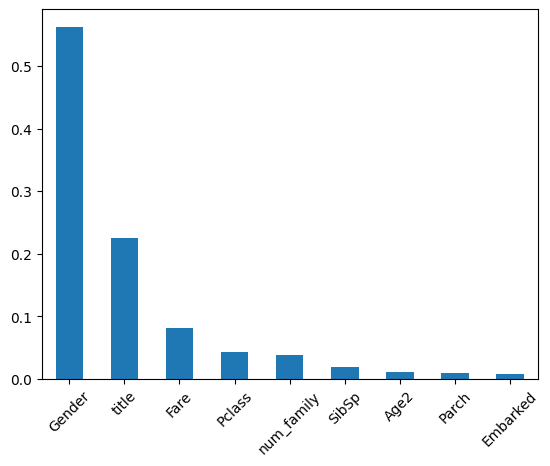

In [ ]:
# feature importance 추출 : 사용된 컬럼들의 평균값을 구함
best_rf.feature_importances_

# Series 자료형 생성
# best_rf.feature_importances_
s_importances = pd.Series(data=best_rf.feature_importances_,index=X_train.columns)

# Series 자료형 --> 내림차순 정렬 + 시각화
s_importances.sort_values(ascending=False).plot(kind='bar',rot=45)
plt.show()

##■ XGBoost 모델을 이용한 분류

- Bagging 알고리즘 : 집단지성 : 동시에(독립적 학습용데이터) : 다수결(평균)

- Boosting 알고리즘 : 순차적 : 차이값(residual:잔차) : 가중치(learning_rate)

###→ 모델생성

In [ ]:
# GridSearchCV 함수 사용

# 필요한 함수 임포트
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# 최적화할 기본모델 생성
base_xgb = XGBClassifier(random_state=0)

# 튜닝할 매개 변수 설정
params = {'n_estimators':[100,200,300,400],
          'learning_rate':[0.05,0.1,0.5],
          'max_depth':[3,5,7,9]}

# GridSearchCV 함수 호출, 모델 생성
grid_xgb = GridSearchCV(estimator=base_xgb,
                        param_grid=params,
                        cv=10,
                        scoring='accuracy')

# 학습 및 평가
grid_xgb.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.05, 0.1, 0.5],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy')

In [ ]:
# 최적의 성능을 나타내는 하이퍼파라미터 조합 확인
# grid_xgb.best_params_
from xgboost import XGBClassifier
# best model 생성
best_xgb = XGBClassifier(learning_rate=0.05,n_estimators=100,max_depth=3,random_state=0)

###→ 모델학습

In [ ]:
best_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

###→ 평가용 데이터에 대한 예측

In [ ]:
# 평가용 데이터
pred_test = best_xgb.predict(X_test)

###→ 모델평가

In [ ]:
# 평가용 데이터에 대한 성능 평가
accuracy_test = accuracy_score(y_test,pred_test)

# 결과확인
print(f'평가용 데이터에 대한 정확도 = {accuracy_test}\n')

평가용 데이터에 대한 정확도 = 0.8727735368956743



###→ feature_importance_ 추출 및 시각화

Pclass        0.068325
Gender        0.698475
SibSp         0.041432
Parch         0.007801
Fare          0.029025
Embarked      0.027948
Age2          0.023145
title         0.054613
num_family    0.049235
dtype: float32


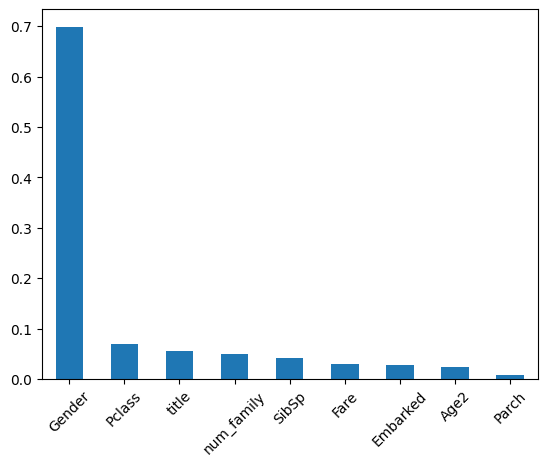

In [ ]:
s_importances = pd.Series(data=best_xgb.feature_importances_,index=X_train.columns)
print(s_importances)
s_importances.sort_values(ascending=False).plot(kind='bar',rot=45)
plt.show()

##■ LightGBM 모델을 이용한 분류

###→ 모델생성

In [ ]:
# 필요한 라이브러리 임포트
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

# 처음부터 GridSearchCV 이용 best model을 생성

# 최적화할 기본모델 생성함수 호출
base_lgbm = LGBMClassifier(random_state=0)

# 튜닝할 하이퍼파라미터 설정
params = {'n_estimators':[50,100,150,200],'learning_rate':[0.01,0.05,0.1,0.3],'max_depth':[3,5,7]}

# GridSearchCV
grid_lgbm = GridSearchCV(estimator=base_lgbm,
                         param_grid=params,
                         cv=10,
                         scoring='accuracy')

# 학습
grid_lgbm.fit(X_train,y_train)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

GridSearchCV(cv=10, estimator=LGBMClassifier(random_state=0),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.3],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [ ]:
# 최적의 하이퍼파라미터 확인
# grid_lgbm.best_params_
# {'learning_rate': 0.05, 'n_estimators': 50}
# {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200}

best_lgbm = LGBMClassifier(n_estimators=100,learning_rate=0.01,max_depth=3,random_state=0)

###→ 모델학습

In [ ]:
best_lgbm.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 346, number of negative: 570
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 189
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377729 -> initscore=-0.499198
[LightGBM] [Info] Start training from score -0.499198
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(learning_rate=0.01, max_depth=3, random_state=0)

###→ 모델예측

In [ ]:
# 예측
pred_test = grid_lgbm.predict(X_test)

###→ 모델평가

In [ ]:
# 평가용 데이터에 대한 성능평가
accuracy_test = accuracy_score(y_test,pred_test)
print(f'평가용 데이터에 대한 성능 평가 : {accuracy_test}\n')

평가용 데이터에 대한 성능 평가 : 0.8702290076335878



###→ feature_importance_ 추출 및 시각화

[ 1358.26928902 19131.52883911    77.53208971     0.
   704.77158889     0.            59.0841198    703.19061184
  1062.68841219]
Pclass         1358.269289
Gender        19131.528839
SibSp            77.532090
Parch             0.000000
Fare            704.771589
Embarked          0.000000
Age2             59.084120
title           703.190612
num_family     1062.688412
dtype: float64


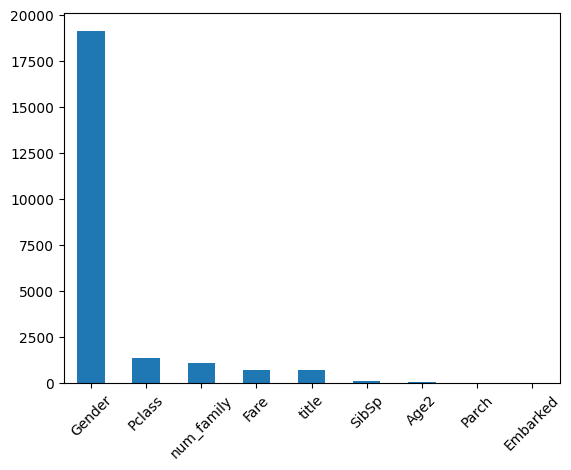

In [ ]:
# # feature importance 추출
# importances = best_lgbm.booster_.feature_importance(importance_type='gain')
# print(importances)

# print('-'*80)

# #Series 자료형 생성
# s_importances = pd.Series(data=importances, index=X_train.columns)
# print(s_importances)

# print('-'*80)

# #Series 자료형 -> 내림차순 정렬+ 시각화
# s_importances.sort_values(ascending=False).plot(kind='bar', rot=45)
# plt.show()

importances = best_lgbm.booster_.feature_importance(importance_type='gain')
print(importances)
s_importances = pd.Series(data=best_lgbm.booster_.feature_importance(importance_type='gain'),index=X_train.columns)
print(s_importances)
s_importances.sort_values(ascending=False).plot(kind='bar',rot=45)
plt.show()

##■ Logistic Regression 모델을 이용한 분류

###→ 모델생성

In [ ]:
# GridSearchCV 함수 실행
# 필요한 함수 임포트
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

# 최적화할 기본 model 생성함수 호출, 모델 생성
base_lgr = LogisticRegression(random_state=0)

# 튜닝할 매개변수 설정
num = np.arange(0.1,3.1,0.1)
params = {'C':num, 'max_iter':[1000,2000]}

# GridSearchCV 함수 실행
grid_lgr = GridSearchCV(estimator=base_lgr,
                        param_grid=params,
                        scoring='accuracy',
                        cv=10)

# 학습 및 평가
grid_lgr.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=0),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. ]),
                         'max_iter': [1000, 2000]},
             scoring='accuracy')

In [ ]:
# 최적의 하이퍼파라미터 확인
print(grid_lgr.best_params_)

{'C': 0.30000000000000004, 'max_iter': 1000}


In [ ]:
# best model 생성
best_lgr = LogisticRegression(C=0.3,max_iter=5000,random_state=0)

###→ 모델학습

In [ ]:
best_lgr.fit(X_train,y_train)

LogisticRegression(C=0.3, max_iter=5000, random_state=0)

###→ 결정경계 확인

In [ ]:
# 결정경계의 가중치
print(f'각 컬럼별 가중치 :\n{best_lgr.coef_}\n')

# 결정경계의 절편(bias)
print(f'결정경계의 절편 : {best_lgr.intercept_}')

각 컬럼별 가중치 :
[[-8.23050194e-01 -3.18048067e+00 -1.56445183e-01  6.59371183e-02
  -2.72576573e-04 -2.21304268e-01 -1.91802279e-01 -1.27006368e-01
  -9.05080646e-02]]

결정경계의 절편 : [4.44027633]


###→ 모델예측

In [ ]:
# 평가용 데이터를 이용한 생존여부 예측
pred_test = best_lgr.predict(X_test)
print(pred_test)

[0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0
 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1
 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0
 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0
 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1
 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1
 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0]


###→ 모델평가

In [ ]:
# 필요한 함수 임포트
from sklearn.metrics import accuracy_score

# 평가용 데이터를 이용한 성능 평가
accu_test = accuracy_score(y_test,pred_test)

# 결과 확인
print(f'평가용 데이터에 대한 정확도(성능) : {accu_test}')

평가용 데이터에 대한 정확도(성능) : 0.8625954198473282


##■ 내가 해본거

0.8445121951219512


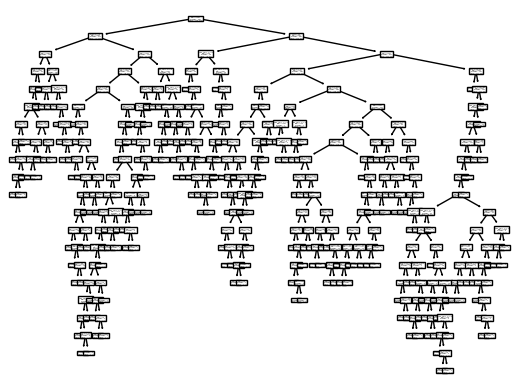

In [ ]:
# 1. 전체 컬럼에 대해서 모델링

# train / test data 분리하기
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

# str 컬럼 제거 : Name(3), Ticket(8)
# 불필요한 컬럼 제거 : PassengerId(0)
X_data = df_titanic.drop(columns=['Survived','alone'])
y_data = df_titanic.loc[:,'Survived']
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,test_size=0.25,random_state=0)

# 모델생성
dt = DecisionTreeClassifier(random_state=0)

# 모델학습
dt.fit(X_train,y_train)

# 트리구조 시각화
plot_tree(dt,feature_names=X_train.columns)

# 예측
pred_test = dt.predict(X_test)

# 모델 평가
acc_model_tot = accuracy_score(y_true=y_test,y_pred=pred_test)
print(acc_model_tot)

In [ ]:
# 2. 전체 컬럼에서 특정 컬럼 제거(alone 제거:0.8292 -> 0.8262 성능저하)

# train / test data 분리하기
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

# str 컬럼 제거 : Name(3), Ticket(8)
# 불필요한 컬럼 제거 : PassengerId(0)
# 모델성능향상을 위해 제거한 컬럼 : alone(14)
X_data = df_titanic.iloc[:,[2,4,5,6,7,9,10,11,12,13]]
y_data = df_titanic.loc[:,'Survived']
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,test_size=0.25,random_state=0)

# 모델생성
dt = DecisionTreeClassifier(random_state=0)

# 모델학습
dt.fit(X_train,y_train)

# 트리구조 시각화
plot_tree(dt,feature_names=X_train.columns)

# 예측
pred_test = dt.predict(X_test)

# 모델 평가
acc_model_tot = accuracy_score(y_true=y_test,y_pred=pred_test)
print(acc_model_tot)

IndexError: ignored

In [ ]:
# 3. 전체 컬럼에서 특정 컬럼 제거(num_family 제거: 0.8292 -> 0.8353 성능향상)

# train / test data 분리하기
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

# str 컬럼 제거 : Name(3), Ticket(8)
# 불필요한 컬럼 제거 : PassengerId(0)
# 모델성능향상을 위해 제거한 컬럼 : num_family(13)
X_data = df_titanic.iloc[:,[2,4,5,6,7,9,10,11,12,14]]
y_data = df_titanic.loc[:,'Survived']
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,test_size=0.25,random_state=0)

# 모델생성
dt = DecisionTreeClassifier(random_state=0)

# 모델학습
dt.fit(X_train,y_train)

# 트리구조 시각화
plot_tree(dt,feature_names=X_train.columns)

# 예측
pred_test = dt.predict(X_test)

# 모델 평가
acc_model_tot = accuracy_score(y_true=y_test,y_pred=pred_test)
print(acc_model_tot)

In [ ]:
# 4. 전체 컬럼에서 특정 컬럼 제거(SibSp/Parch 제거: 0.8353 -> 0.8414 성능향상)
#    : num_family를 제거했을때 성능이 올라갔으므로 SibSp/Parch도 제거해보자

# train / test data 분리하기
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

# str 컬럼 제거 : Name(3), Ticket(8)
# 불필요한 컬럼 제거 : PassengerId(0)
# 모델성능향상을 위해 제거한 컬럼 : SibSp(6), Parch(7), num_family(13)
X_data = df_titanic.iloc[:,[2,4,5,9,10,11,12,14]]
y_data = df_titanic.loc[:,'Survived']
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,test_size=0.25,random_state=0)

# 모델생성
dt = DecisionTreeClassifier(random_state=0)

# 모델학습
dt.fit(X_train,y_train)

# 트리구조 시각화
plot_tree(dt,feature_names=X_train.columns)

# 예측
pred_test = dt.predict(X_test)

# 모델 평가
acc_model_tot = accuracy_score(y_true=y_test,y_pred=pred_test)
print(acc_model_tot)

In [ ]:
# 5. 전체 컬럼에서 특정 컬럼 제거(title 제거: 0.8414 -> 0.8414 )

# train / test data 분리하기
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

# str 컬럼 제거 : Name(3), Ticket(8)
# 불필요한 컬럼 제거 : PassengerId(0)
# 모델성능향상을 위해 제거한 컬럼 : SibSp(6), Parch(7), title(12), num_family(13)
X_data = df_titanic.iloc[:,[2,4,5,9,10,11,14]]
y_data = df_titanic.loc[:,'Survived']
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,test_size=0.25,random_state=0)

# 모델생성
dt = DecisionTreeClassifier(random_state=0)

# 모델학습
dt.fit(X_train,y_train)

# 트리구조 시각화
plot_tree(dt,feature_names=X_train.columns)

# 예측
pred_test = dt.predict(X_test)

# 모델 평가
acc_model_tot = accuracy_score(y_true=y_test,y_pred=pred_test)
print(acc_model_tot)

In [ ]:
df_titanic.info()

In [ ]:
# 6. 데이터 분석시 확률이 가장 높았던 컬럼만 추가(사용한 컬럼 : Pclass, Embarked, Age2, Gender)
#    : 0.8780
# train / test data 분리하기
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

# str 컬럼 제거 : Name(3), Ticket(8)
# 불필요한 컬럼 제거 : PassengerId(0)
X_data = df_titanic.iloc[:,[1,2,6,7]]
y_data = df_titanic.loc[:,'Survived']
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,test_size=0.25,random_state=0)

# 모델생성
grid_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                       param_grid={'max_depth':[3,4,5,6,7,8,9,10]},
                       cv=10,
                       scoring='accuracy')

# 모델학습
grid_dt.fit(X_train,y_train)

# 최적 하이퍼파라미터 확인
# print(grid_dt.best_params_)

# best 모델생성
best_dt = DecisionTreeClassifier(max_depth=3, random_state=0)
best_dt.fit(X_train,y_train)

# 트리구조 시각화
plot_tree(best_dt,feature_names=X_train.columns)
plt.show()

# 예측
pred_test = best_dt.predict(X_test)

# 최적화된 모델 평가
accuracy_test = accuracy_score(y_true=y_test,y_pred=pred_test)
print(accuracy_test)